In [1]:
import main
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Class of our model

In [2]:
class forest:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        self.rfc = RandomForestClassifier()
        self.y_pred = self.rfc.fit(self.X_train, self.y_train).predict(self.X_test)
        self.mislabeled = (self.y_test != self.y_pred).sum()
        self.accuracy = accuracy_score(self.y_test,self.y_pred)
        # print("Number of mislabeled points out of a total %d points : %d"% (self.X_test.shape[0], self.mislabeled))
        # print("Accuracy score: ", self.accuracy)

## Creation of model

In [3]:
def model(n, lines, groups=[]):
    X_nostopwords = main.vectorize(n, lines, stop_words=False)
    if groups:
        X_stopwords = main.vectorize(n, groups, stop_words=False)
    else:
        X_stopwords = main.vectorize(n, lines, stop_words=True)
    y = main.labels
    
    return forest(X_stopwords, y), forest(X_nostopwords, y)

# Words before and after "interest"

Here are the results of our model with $n$ words before and after "interest" ($n \in 1,...,10$).

In [4]:
words_result = {
                "with_stop":[],
                "without_stop":[]
                }

In [5]:
for i in range(1,51):
    stop,nostop = model(i, main.words_only)
    words_result["with_stop"].append(stop)
    words_result["without_stop"].append(nostop)

# Categories of words

### With stop words

Here are the results of our model with the $n$ categories of the words before and after "interest" ($n \in 1,...,10$).

In [6]:
categories_result = {
                "with_stop":[],
                "without_stop":[]
                }

In [7]:
for i in range(1,51):
    stop,nostop = model(i, main.groups_only, main.groups_no_stop)
    categories_result["with_stop"].append(stop)
    categories_result["without_stop"].append(nostop)

# Graphes

### Words around "interest"

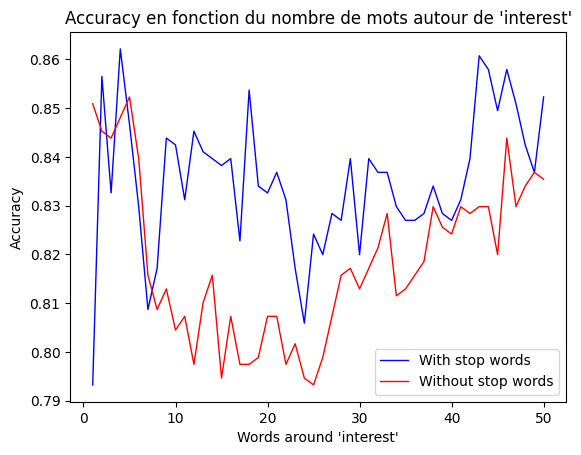

In [8]:
x = range(1, 51)
y1 = [m.accuracy for m in words_result["with_stop"]]
y2 = [m.accuracy for m in words_result["without_stop"]]

plt.plot(x, y1, marker='', color='blue', linewidth=1, label="With stop words")
plt.plot(x, y2, marker='', color='red', linewidth=1, label="Without stop words")
plt.title("Accuracy en fonction du nombre de mots autour de 'interest'")
plt.xlabel("Words around 'interest'")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Categories around "interest"

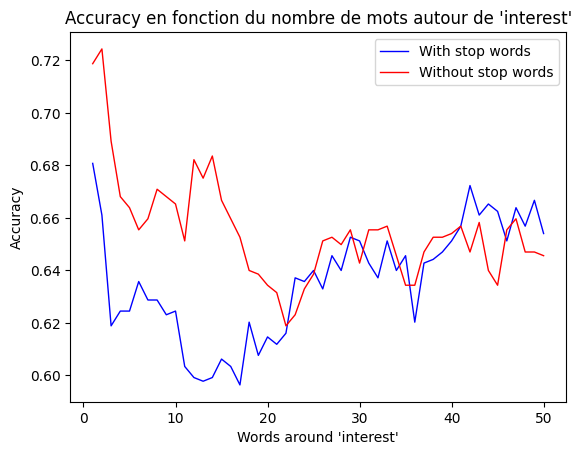

In [9]:
x = range(1, 51)
y1 = [m.accuracy for m in categories_result["with_stop"]]
y2 = [m.accuracy for m in categories_result["without_stop"]]

plt.plot(x, y1, marker='', color='blue', linewidth=1, label="With stop words")
plt.plot(x, y2, marker='', color='red', linewidth=1, label="Without stop words")
plt.title("Accuracy en fonction du nombre de mots autour de 'interest'")
plt.xlabel("Words around 'interest'")
plt.ylabel("Accuracy")
plt.legend()
plt.show()